# This generate the base files for the video usage

In [1]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
ROOT = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was"
GRAPHIC_FOLDER = f"{ROOT}/_graphic/_video/assets"
DATA_FOLDER = f"{ROOT}/_table"
os.listdir(DATA_FOLDER)
file_path = f"{DATA_FOLDER}/road_fatality_built_env_res=9_cluster=7_fixed_effect_policy_year.csv"
sr_path = f"{ROOT}/_data/_curated/c_analysis/c_city_built_environment_full_cluster=7_ncat=27.csv"
df_result = pd.read_csv(file_path)[2:]
df_src = pd.read_csv(sr_path)
df_src

,city_lower,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,total,diversity,...,truck,van,window,sprawl_sndi,length_intersection_meter,admin,Continent,policy_cat,policy_year_cat,earlier version if any
0,accra,0.336024,0.025732,0.046922,0.093845,0.093340,0.125631,0.278507,1982.0,0.855238,...,344.740078,459.386826,7.693039,4.2,2430.527908,Ghana,Africa,strategy,2000-2010,2001
1,amsterdam,0.116170,0.097331,0.144427,0.248038,0.181057,0.127682,0.085296,1911.0,0.968326,...,285.129584,264.494752,6.703559,NaN,7002.665047,Netherlands,Europe,plan,before 2000,1983
2,antwerp,0.266367,0.121309,0.086650,0.191913,0.197047,0.095635,0.041078,1558.0,0.931527,...,1817.183164,578.688803,7.755715,3.2,4346.650283,Belgium,Europe,strategy,after 2010,2011
3,athens,0.108108,0.095047,0.087210,0.046619,0.053954,0.140862,0.468201,9953.0,0.826737,...,218.721056,126.929589,7.338950,NaN,4161.796296,Greece,Europe,plan,2000-2010,2001
4,auckland,0.154864,0.005292,0.132140,0.392840,0.151907,0.052451,0.110506,6425.0,0.840417,...,259.983076,182.011807,9.769772,3.7,4221.343931,New Zealand,Australia,strategy,after 2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,vienna,0.116987,0.126923,0.095833,0.212500,0.199679,0.129808,0.118269,3120.0,0.979529,...,601.931614,799.698036,647.528881,3.0,7203.150044,Austria,Europe,program,2000-2010,2002
104,vijayawada,0.103306,0.061983,0.260331,0.123967,0.028926,0.099174,0.322314,242.0,0.880123,...,838.516650,53.823945,14.738221,4.9,2210.356389,India,Asia,policy,after 2010,2010
105,wellington,0.142686,0.005995,0.133993,0.218825,0.072242,0.045264,0.380995,3336.0,0.826301,...,94.618031,86.127842,3.032306,NaN,2918.196526,New Zealand,Australia,strategy,after 2010,2010
106,yamaguchi,0.173435,0.054351,0.279695,0.078473,0.030229,0.038473,0.345344,3275.0,0.830706,...,101.270638,56.974785,2.379545,2.4,1839.099223,Japan,Asia,plan,before 2000,1970


In [9]:
df_src.columns

Index(['city_lower', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'total', 'diversity',
       'total_flux', 'mean_flux', 'flux_n_points', 'City', 'country_clean',
       'State/Province', 'urban_pop', 'Metro', 'gdp_billion_metro',
       'gdp_pop_metro', 'source_year', 'gdp_per_cap',
       'gdp_per_cap_country_2022', 'un_category', 'un_category_source',
       'country_worldbank', 'labor_force_female', 'labor_force_male',
       'country', 'public_transit_access_rate', 'transit_data_reference_year',
       'center_lat', 'center_lng', 'num_person_killed_per_lakh_country',
       'num_person_killed_per_lakh_city', 'diabetes_mellitus_cap',
       'mental_and_substance_use_disorders_cap', 'cardiovascular_diseases_cap',
       'road_injury_cap', 'road_injury_5-14_cap', 'road_injury_15-29_cap',
       'num_person_killed_per_lakh', 'waze_accident_count', 'num_hex',
       'img_count', 'panoid_count', 'sidewalk_presence', 'exposure_presenc

In [11]:
df_src[df_src['city_lower']=='newyork']['num_person_killed_per_lakh_city']

71    2.48
Name: num_person_killed_per_lakh_city, dtype: float64

In [3]:
df_result = pd.read_csv(file_path)[28:38]
df_result.columns = ["variable", "model1", "model2", "model3", "model4", "model5"]
for col in df_result.columns:
    df_result[col] = df_result[col].apply(lambda x: str(x).replace("=", ""))
    df_result[col] = df_result[col].apply(lambda x: str(x).replace('"', ''))
df_result = df_result[df_result['variable']!=''].reset_index(drop=True)[['variable', 'model3']]
df_result

,variable,model3
0,Open Arterials,0.013\sym{**}
1,Low-rise Community,0.008
2,Suburban Fringe,0.015\sym{*}
3,High-rise Community,0.009
4,Dense Road Core,0.014


In [4]:
df_result['model3_t'] = 0
df_result.loc[df_result['model3'].str.contains("\*"), 'model3_t'] = 1
df_result.loc[df_result['model3'].str.contains("\*\*"), 'model3_t'] = 2
# keep the number only in model3 use regex
df_result['model3'] = df_result['model3'].apply(lambda x: float(re.findall(r'(\d+\.\d+)', x)[0]))
df_result

,variable,model3,model3_t
0,Open Arterials,0.013,2
1,Low-rise Community,0.008,0
2,Suburban Fringe,0.015,1
3,High-rise Community,0.009,0
4,Dense Road Core,0.014,0


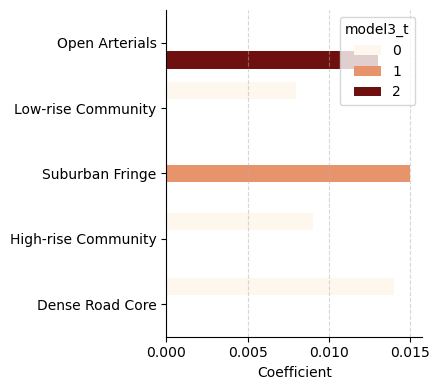

In [7]:
fig, ax = plt.subplots(figsize=(4.5,4))

sns.barplot(y="variable", 
            x="model3", 
            data=df_result, 
            palette="OrRd", 
            hue='model3_t',
            # set the space between the bars to 0.5
            dodge = True,
            )
ax.set_ylabel("")
ax.set_xlabel("Coefficient")
# set top and right spines to false
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# show major ygridlines
ax.xaxis.grid(True, linestyle='--', alpha=0.5)
fig.savefig(os.path.join(GRAPHIC_FOLDER, 
                         "video_asset_road_fatality_cluster.svg"),
            bbox_inches='tight',
            dpi=300,
            transparent=True)

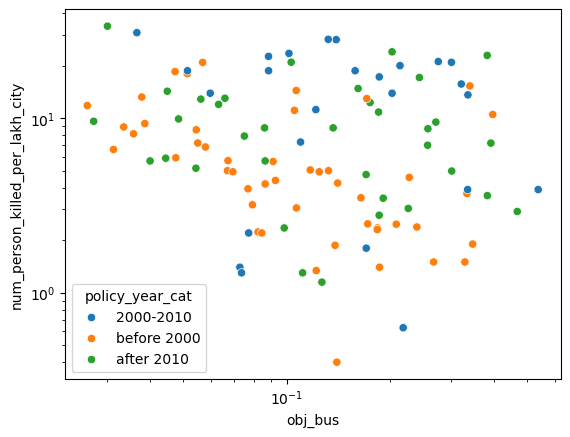

In [11]:
sns.scatterplot(data=df_src, x="obj_bus", y="num_person_killed_per_lakh_city", hue="policy_year_cat")
# log scale
plt.xscale("log")
plt.yscale("log")